### Objective
- Use non-linear units like ReLU to improve your model
- Build a deeper neural network (with more than 1 hidden layer)
- Implement an easy-to-use neural network class


In [172]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
# from testCases_v2 import *
from dnn_app_utils_v2 import load_data, predict
from dnn_utils_v2 import sigmoid, sigmoid_backward, relu, relu_backward


%matplotlib inline
plt.rcParams['figure.figsize'] = (5.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

np.random.seed(1)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [248]:
def L_initialize_parameters(layer_dims):
    np.random.seed(1)
    params = {}
    for l in range(1, len(layer_dims)):
        params["W"+str(l)] = np.random.randn(layer_dims[l], layer_dims[l-1]) * 0.01
        params["b"+str(l)] = np.zeros((layer_dims[l], 1))
    return params

In [245]:
def L_model_forward(X, params):
    A = X 
    L = int(len(params)/2) # Length of layers
    caches = []
    for i in range(1, L):
        W = params["W"+str(i)]
        b = params["b"+str(i)]
        Z = np.dot(W, A) + b
        caches.append([A,W,b,Z]) ## A_prev, W, b, Z
        A = np.maximum(0,Z) # RELU
#         print(A.shape)
    Z = np.dot(params["W"+str(L)], A) + params["b"+str(L)]
    AL = 1/(1+np.exp(-Z))
    caches.append([A,params["W"+str(L)],params["b"+str(L)],Z])

    
    return AL, caches

In [122]:
def compute_cost(AL, Y):
    m = Y.shape[1]
    cost = (-1./m)*np.sum((Y*np.log(AL) + (1-Y)*np.log(1-AL)), axis = 1)
    cost = np.squeeze(cost)
    return cost

In [158]:
def backward_propagate(cache, dAL, activation):
    A_prev, W, b, Z = cache
    m = A_prev.shape[1]
    if activation == "relu":
        dZ = relu_backward(dAL, Z)
    if activation == "sigmoid":
        dZ = sigmoid_backward(dAL, Z)

    dW = (1. / m) * np.dot(dZ, A_prev.T) 
    db = (1. / m) * np.sum(dZ, axis=1, keepdims=True)
    dA_prev = np.dot(W.T, dZ)
    
    assert(dZ.shape == dAL.shape)
    assert(dW.shape == W.shape)
    assert(db.shape == b.shape)
    return dA_prev, dW, db

def L_model_backward(AL, Y, cache):
    L = len(cache)
    grads = {}
    dAL = - (np.divide(Y, AL) - np.divide(1 - Y, 1 - AL))
    grads["dA" + str(L)], grads["dW" + str(L)], grads["db" + str(L)] = backward_propagate(cache[-1], dAL, "sigmoid")
    for l in reversed(range(L-1)):
        a, b, c = backward_propagate(cache[l], grads["dA" + str(l + 2)], "relu")
        grads["dA" + str(l + 1)], grads["dW" + str(l + 1)], grads["db" + str(l + 1)] = a, b, c 
    return grads

In [240]:
def update_parameters(parameters, grads, weight_matrix, learning_rate = 0.0075):
    L = int(len(parameters)/2)
    for l in range(L):
        parameters["W" + str(l+1)] = parameters["W" + str(l+1)] - learning_rate * grads["dW" + str(l+1)]
        parameters["b" + str(l+1)] = parameters["b" + str(l+1)] - learning_rate * grads["db" + str(l+1)]
        
    
    return parameters

In [241]:
def L_layer_model(X, Y, layers_dims, learning_rate = 0.0075, num_iterations = 3000, print_cost = False):
    np.random.seed(1)
    costs = []
    weight_matrix = np.zeros(shape = (layers_dims[0],len(layers_dims)))
    parameters = L_initialize_parameters(layers_dims)
    for i in range(0, num_iterations):
        AL, caches = L_model_forward(X, parameters)
        cost = compute_cost(AL, Y)
        grads = L_model_backward(AL, Y, caches)
        parameters = update_parameters(parameters, grads, weight_matrix, learning_rate)
        
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
        if print_cost and i % 100 == 0:
            costs.append(cost)
            
    # plot the cost
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per tens)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    return parameters

In [12]:
train_x_orig, train_y, test_x_orig, test_y, classes = load_data()
# Reshape the training and test examples 
train_x_flatten = train_x_orig.reshape(train_x_orig.shape[0], -1).T   # The "-1" makes reshape flatten the remaining dimensions
test_x_flatten = test_x_orig.reshape(test_x_orig.shape[0], -1).T

# Standardize data to have feature values between 0 and 1.
train_x = train_x_flatten/255.
test_x = test_x_flatten/255.

print ("train_x's shape: " + str(train_x.shape))
print ("test_x's shape: " + str(test_x.shape))

train_x's shape: (12288, 209)
test_x's shape: (12288, 50)


In [198]:
train_y

array([[0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
        0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0,
        0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
        1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
        1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,
        0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1,
        0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1,
        0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
        0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]], dtype=int64)

Cost after iteration 0: 0.693050
Cost after iteration 100: 0.646432
Cost after iteration 200: 0.632514
Cost after iteration 300: 0.601502
Cost after iteration 400: 0.560197
Cost after iteration 500: 0.515830
Cost after iteration 600: 0.475490
Cost after iteration 700: 0.433916
Cost after iteration 800: 0.400798
Cost after iteration 900: 0.358071
Cost after iteration 1000: 0.339428
Cost after iteration 1100: 0.305275
Cost after iteration 1200: 0.274914
Cost after iteration 1300: 0.246818
Cost after iteration 1400: 0.198507
Cost after iteration 1500: 0.174483
Cost after iteration 1600: 0.170808
Cost after iteration 1700: 0.113065
Cost after iteration 1800: 0.096294
Cost after iteration 1900: 0.083426
Cost after iteration 2000: 0.074391
Cost after iteration 2100: 0.066307
Cost after iteration 2200: 0.059193
Cost after iteration 2300: 0.053361
Cost after iteration 2400: 0.048555


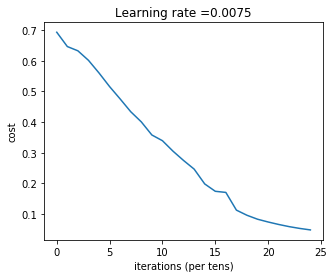

In [247]:
layers_dims = [12288, 7, 1] #  5-layer model
parameters = L_layer_model(train_x, train_y, layers_dims, num_iterations = 2500, print_cost = True)

Cost after iteration 0: 0.693149
Cost after iteration 100: 0.678010
Cost after iteration 200: 0.667599
Cost after iteration 300: 0.660421
Cost after iteration 400: 0.655457
Cost after iteration 500: 0.652013
Cost after iteration 600: 0.649615
Cost after iteration 700: 0.647941
Cost after iteration 800: 0.646769
Cost after iteration 900: 0.645947
Cost after iteration 1000: 0.645368
Cost after iteration 1100: 0.644960
Cost after iteration 1200: 0.644673
Cost after iteration 1300: 0.644469
Cost after iteration 1400: 0.644325
Cost after iteration 1500: 0.644223
Cost after iteration 1600: 0.644151
Cost after iteration 1700: 0.644100
Cost after iteration 1800: 0.644063
Cost after iteration 1900: 0.644037
Cost after iteration 2000: 0.644019
Cost after iteration 2100: 0.644006
Cost after iteration 2200: 0.643997
Cost after iteration 2300: 0.643990
Cost after iteration 2400: 0.643985


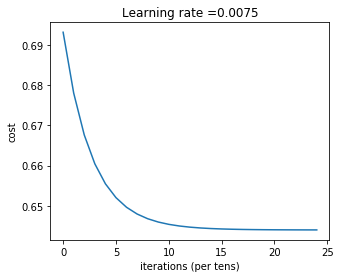

In [250]:
layers_dims = [12288, 20, 7, 5, 1] #  5-layer model
parameters = L_layer_model(train_x, train_y, layers_dims, num_iterations = 2500, print_cost = True)

In [182]:
pred_train = predict(train_x, train_y, parameters)

Accuracy: 0.6555023923444976


In [183]:
pred_test = predict(test_x, test_y, parameters)

Accuracy: 0.3400000000000001


In [187]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer(return_X_y = True)

In [191]:
data[0].shape

(569, 30)

In [201]:
Y = np.reshape(data[1], (1,569))

In [204]:
Y.shape

(1, 569)

Cost after iteration 0: 0.694236
Cost after iteration 100: 0.682818
Cost after iteration 200: 0.642333
Cost after iteration 300: 0.574440
Cost after iteration 400: 0.496961
Cost after iteration 500: 0.485582
Cost after iteration 600: 0.288101
Cost after iteration 700: 0.251990
Cost after iteration 800: 0.254257
Cost after iteration 900: 0.274047
Cost after iteration 1000: 0.251183
Cost after iteration 1100: 0.245443
Cost after iteration 1200: 0.231638
Cost after iteration 1300: 0.228704
Cost after iteration 1400: 0.222224
Cost after iteration 1500: 0.214624
Cost after iteration 1600: 0.213950
Cost after iteration 1700: 0.207263
Cost after iteration 1800: 0.205057
Cost after iteration 1900: 0.216963
Cost after iteration 2000: 0.208862
Cost after iteration 2100: 0.207957
Cost after iteration 2200: 0.189584
Cost after iteration 2300: 0.189037
Cost after iteration 2400: 0.190245


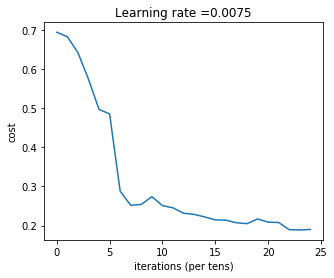

In [246]:
layers_dims = [30, 15, 7, 1] #  5-layer model
parameters = L_layer_model(data[0].T, Y, layers_dims, num_iterations = 2500, print_cost = True, learning_rate = 0.0075)

In [212]:
pred_train = predict(data[0].T, Y, parameters)

Accuracy: 0.6274165202108962


In [236]:
a = np.zeros(shape = (30,4))

In [237]:
import pandas as pd
b = pd.DataFrame(data = a)
b

,0,1,2,3
0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0
